# MNIST Data Set - Basic Approach

### Get the MNIST Data

In [1]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True) # we set the actual labels by one-hot encoding

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


** Alternative sources of the data just in case: **

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

In [4]:
type(mnist) # it's the tensorflow dataset option

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images # training dataset under mnist with images data with numpy arrays

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
# Let's check the shape 
mnist.train.images.shape # this means we have 55,000 images with 784 pixels

(55000, 784)

In [7]:
mnist.train.num_examples # comfirm the number of images, we have 55000 number of images we have in this trian dataset of mnist

55000

In [8]:
mnist.test.num_examples # we have 10,000 number of examples in test dataset.

10000

In [9]:
mnist.validation.num_examples

5000

### Visualizing the Data

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# let's look at the image with index 1
mnist.train.images[1] # this is a large array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
# Let's check the shape of it
mnist.train.images[1].shape # 784 should be 28 by 28 which is the original image pixels

(784,)

In [13]:
mnist.train.images[1].reshape(28, 28) # this is the image reshaped, let's print this image out

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

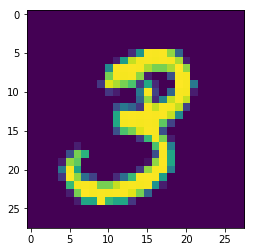

In [14]:
# Use the plt.imshow to see this picture. We represent this picture through the pixel values. 0 is the darkest pixel point, 1 is the lightest pixel point.
plt.imshow(mnist.train.images[1].reshape(28,28))

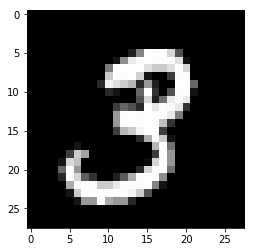

In [15]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray') # in a grey style, pass the gist_gray to parameter cmap
# we won't pass the 28 by 28 shape to our neural network, instead, we will use the 28*28 = 784, the original shape to our neural network, essentially,
# a vector of numbers.

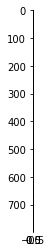

In [16]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray') # This is going to be a really long vector here. It's impossible to visualize, it will just be a vector

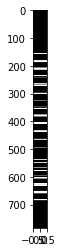

In [17]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray', aspect = 0.02)  # You may set up the parameter aspect, which can give a little better visualization

In [18]:
# This vector is going to pass in our neural network.

In [19]:
mnist.train.images[1].max()

1.0

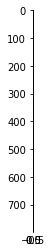

In [20]:
plt.imshow(mnist.train.images[1].reshape(784,1))

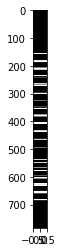

In [21]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

## Create the Model

In [22]:
x = tf.placeholder(tf.float32,shape=[None,784]) # the first one parameter is the datatype you are expecting to pass in. The type we are use here is float32,=.
# if you want it more precise, you may pass in by using float64, but it's not really necessary. 
# It's a placeholder, so we put the none here. We know the length of the vector, that is 784.

In [23]:
# 10 because 0-9 possible numbers
# Let's assign the weights
# Start the weights as 0s. The first parameter is shape, by 10. We set 10, because we are going to have 10 passible numbers which are 0,1,2,3,4,5,6,7,8,9
# 10 passible numbers.
W = tf.Variable(tf.zeros([784,10]))

In [24]:
# b is our biases. Add 10 baises for different numbers (0 to 9)
b = tf.Variable(tf.zeros([10]))

In [25]:
# Create the Graph
# Let's call matmul for matrix multiplication -> x multiply by the weights.
y = tf.matmul(x,W) + b 

Loss and Optimizer

In [26]:
# Define the loss function
y_true = tf.placeholder(tf.float32, shape = [None,10]) # this one we are going to pass the actual correct labels. With none with 10 possible labels.

In [27]:
# Let's check the actual labels.
mnist.train.labels[0] # start with 0 , represent the number

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [28]:
# let's check another one
mnist.train.labels[6]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
mnist.train.labels[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [29]:
# Cross Entropy , fancy way to say the actual error

In [30]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y)) # v2 is the improved version. # this is trying to reduce the
# true labels with the one we predicted. labels = y_true -> true labels. logits -> predicted labels

In [31]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [33]:
train = optimizer.minimize(cross_entropy) # Here we use gradient descent optimizer to reducte the cross_entropy

### Create Session

In [34]:
init = tf.global_variables_initializer() # initialize all the variables

In [35]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(1000):
        
        batch_x , batch_y = mnist.train.next_batch(100) # mnist.tain actually has the method next_batch to train the batches
        
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y}) # feed_dict is the actual values you pass by for x and y. We pass the batch_x and batch_y to the place holder x and y_true
        
    # Test the Train Model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1)) # whether there's a equal label between the one we predicted (y) and the actual labels (y_true)
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))  # This time we want to know the accuracy on my testset

0.9147


In [35]:
# The above chunk of code can be used by using tensorflow estimator, which is more like sklearn way of training model
# the accuracy is around 90%

While this may seem pretty good, we can actually do much better, the best models can get above 99% accuracy.
